Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Style Transfer berhasil dimuat.
Bentuk gambar Konten (Koala): (1, 348, 512, 3)
Bentuk gambar Gaya (Awan): (1, 341, 512, 3)

Memulai proses Style Transfer...
Style Transfer Selesai!


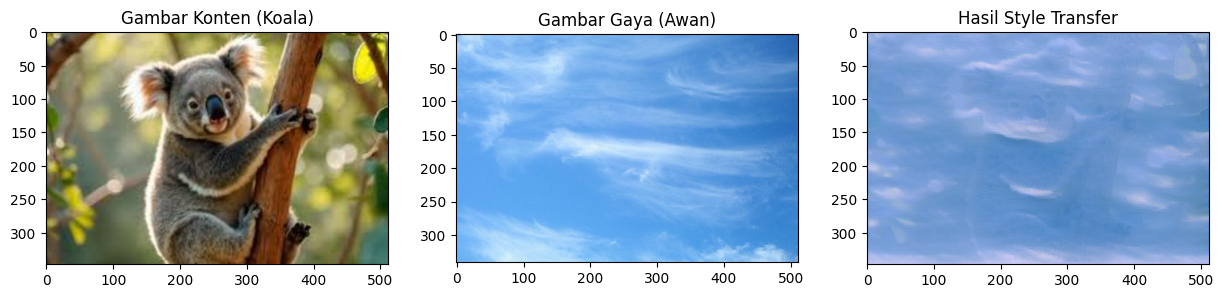


Hasil Style Transfer berhasil disimpan di: /content/drive/MyDrive/DL LANJUT/FOTO/Hasil_Koala_Awan_StyleTransfer.png


In [1]:
# Import Libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# 1. Mount Google Drive
# Ini akan meminta Anda untuk otorisasi akses ke Google Drive.
drive.mount('/content/drive')

# 2. Definisikan Path Gambar
# Gambar Konten (Content Image)
content_path = '/content/drive/MyDrive/DL LANJUT/FOTO/Koala.jpg'
# Gambar Gaya (Style Image)
style_path = '/content/drive/MyDrive/DL LANJUT/FOTO/Awan.jpg'

# Maksimum ukuran gambar untuk dipertahankan
# Maksimum 512x512 biasanya cukup untuk style transfer
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    # Menambahkan dimensi batch (batch size 1)
    img = img[tf.newaxis, :]
    return img

# Fungsi untuk menampilkan tensor gambar
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0) # Hilangkan dimensi batch

    plt.imshow(image)
    if title:
        plt.title(title)

# 4. Muat Model dari TensorFlow Hub
# Model untuk Arbitrary Image Stylization (Fast style transfer for arbitrary styles)
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print("Model Style Transfer berhasil dimuat.")

# 5. Memuat Gambar
content_image = load_img(content_path)
style_image = load_img(style_path)

# Memeriksa apakah gambar sudah dimuat
print(f"Bentuk gambar Konten (Koala): {content_image.shape}")
print(f"Bentuk gambar Gaya (Awan): {style_image.shape}")

# 6. Menjalankan Style Transfer
# Model membutuhkan tensor gambar dengan bentuk (1, H, W, 3)
print("\nMemulai proses Style Transfer...")
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
print("Style Transfer Selesai!")

# 7. Visualisasi Hasil
plt.figure(figsize=(15, 5))

# Tampilkan Gambar Konten
plt.subplot(1, 3, 1)
imshow(content_image, 'Gambar Konten (Koala)')

# Tampilkan Gambar Gaya
plt.subplot(1, 3, 2)
imshow(style_image, 'Gambar Gaya (Awan)')

# Tampilkan Hasil Style Transfer
plt.subplot(1, 3, 3)
imshow(stylized_image, 'Hasil Style Transfer')

plt.show()

# 8. Simpan Hasil Gambar ke Google Drive
# Mengubah tensor kembali menjadi format gambar (misalnya PNG)
result_path = '/content/drive/MyDrive/DL LANJUT/FOTO/Hasil_Koala_Awan_StyleTransfer.png'

# Konversi dari float32 [0, 1] ke unit8 [0, 255]
stylized_image_uint8 = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
# Hilangkan dimensi batch (dari (1, H, W, 3) menjadi (H, W, 3))
stylized_image_uint8 = tf.squeeze(stylized_image_uint8, axis=0)

try:
    # Menggunakan tf.io.write_file untuk menyimpan tensor
    encoded_image = tf.image.encode_png(stylized_image_uint8)
    tf.io.write_file(result_path, encoded_image)
    print(f"\nHasil Style Transfer berhasil disimpan di: {result_path}")
except Exception as e:
    print(f"Gagal menyimpan gambar: {e}")